In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kyphosis.csv")
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [20]:
df["Kyphosis"].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.corr(numeric_only=True)

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


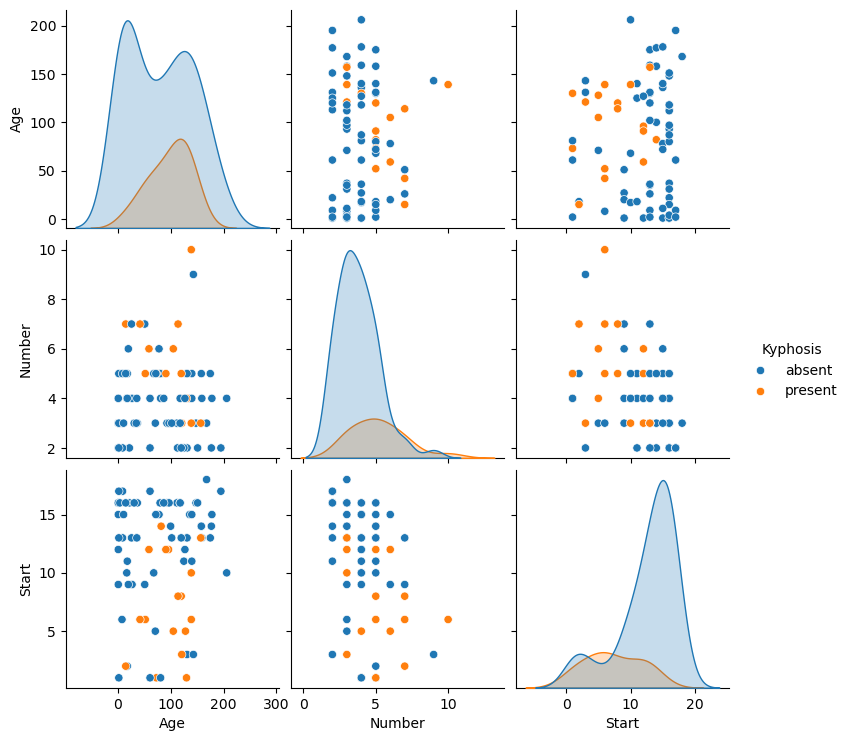

In [7]:
sns.pairplot(df, hue="Kyphosis")

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("Kyphosis", axis = 1)
y = df["Kyphosis"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# Prediction and Evaluation

In [76]:
pred = dtree.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [79]:
print(confusion_matrix(y_test, pred))

[[17  2]
 [ 5  1]]


# Tree Visualize

In [37]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

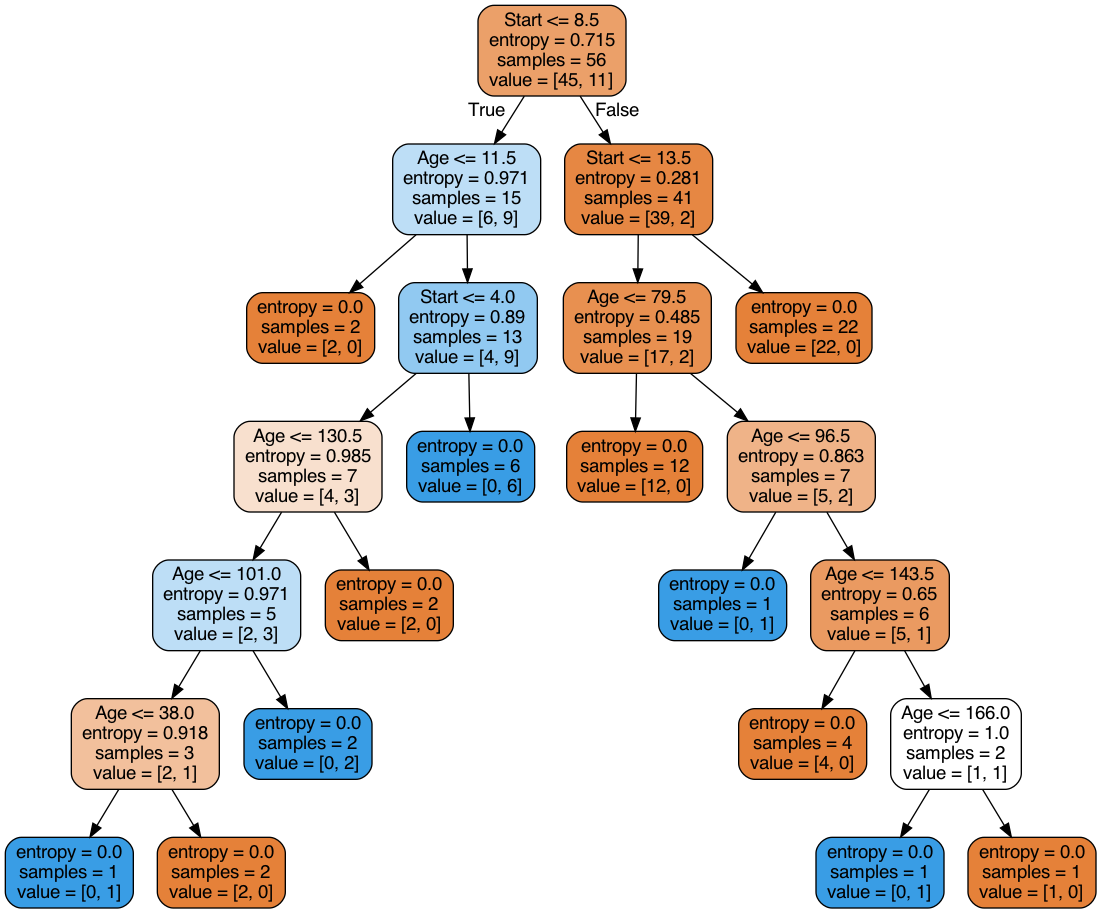

In [38]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

([<matplotlib.axis.YTick at 0x323aabf50>,
 [Text(0, 0, 'Number'), Text(0, 1, 'Age'), Text(0, 2, 'Start')])

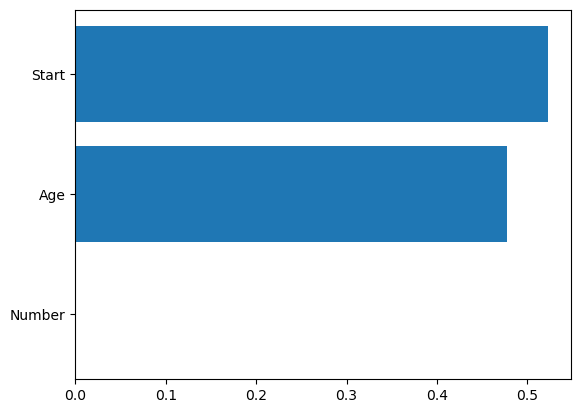

In [39]:
sorted_id = dtree.feature_importances_.argsort()
plt.barh(range(len(sorted_id)), dtree.feature_importances_[sorted_id])
plt.yticks(range(len(sorted_id)), [df.columns[1:][i] for i in sorted_id])

In [40]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

# Random Forests

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [93]:
rf_pred = rf.predict(X_test)

In [94]:
rf.feature_importances_

array([0.26316848, 0.1960147 , 0.54081682])

([<matplotlib.axis.YTick at 0x324d48750>,
 [Text(0, 0, 'Number'), Text(0, 1, 'Age'), Text(0, 2, 'Start')])

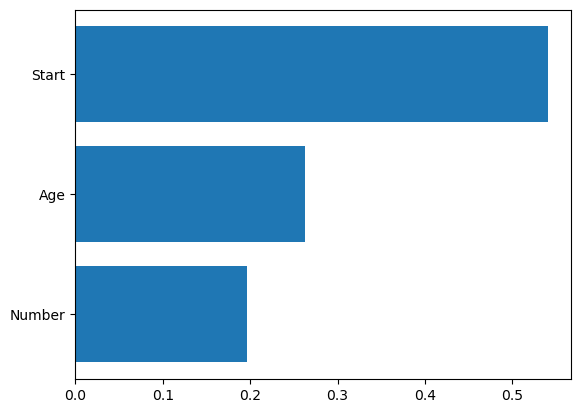

In [95]:
sorted_id = rf.feature_importances_.argsort()
plt.barh(range(len(sorted_id)), rf.feature_importances_[sorted_id])
plt.yticks(range(len(sorted_id)), [df.columns[1:][i] for i in sorted_id])

In [96]:
print(confusion_matrix(rf_pred, y_test))

[[19  5]
 [ 0  1]]


In [97]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

